In [1]:
!pip install kmodes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from calendar import month_abbr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [3]:
data = pd.read_csv("schoolData.csv")
data.head()

,Unnamed: 0,school,classname,subject,CorrectAnswers,TotalAnswers,CorrectAdaptive,TotalAdaptiveAnswers,TotalAdaptiveExercises,TotalExercises,periode.van,periode.tot,lln.ID.school,van.tot
0,0,148,1996922,Automatiseren (extra),21.0,25.0,0.0,0.0,0.0,21.0,aug 2014,jan 2015,3566797,aug2014|jan2015
1,1,148,1996922,Rekenen,295.0,492.0,64.0,77.0,65.0,340.0,aug 2014,jan 2015,3566797,aug2014|jan2015
2,2,148,1996922,Spelling,296.0,341.0,36.0,47.0,39.0,307.0,aug 2014,jan 2015,3566797,aug2014|jan2015
3,3,148,1996922,Taal,197.0,334.0,58.0,70.0,59.0,205.0,aug 2014,jan 2015,3566797,aug2014|jan2015
4,4,148,1996922,Woordenschat (extra),30.0,48.0,15.0,19.0,15.0,30.0,aug 2014,jan 2015,3566797,aug2014|jan2015


In [4]:
data.columns

Index(['Unnamed: 0', 'school', 'classname', 'subject', 'CorrectAnswers',
       'TotalAnswers', 'CorrectAdaptive', 'TotalAdaptiveAnswers',
       'TotalAdaptiveExercises', 'TotalExercises', 'periode.van',
       'periode.tot', 'lln.ID.school', 'van.tot'],
      dtype='object')

In [5]:
data = data[['classname', 'subject', 'CorrectAnswers', 'TotalAnswers', 'CorrectAdaptive', 'TotalAdaptiveAnswers',
       'TotalAdaptiveExercises', 'TotalExercises', 'periode.van', 'periode.tot']]
data

,classname,subject,CorrectAnswers,TotalAnswers,CorrectAdaptive,TotalAdaptiveAnswers,TotalAdaptiveExercises,TotalExercises,periode.van,periode.tot
0,1996922,Automatiseren (extra),21.0,25.0,0.0,0.0,0.0,21.0,aug 2014,jan 2015
1,1996922,Rekenen,295.0,492.0,64.0,77.0,65.0,340.0,aug 2014,jan 2015
2,1996922,Spelling,296.0,341.0,36.0,47.0,39.0,307.0,aug 2014,jan 2015
3,1996922,Taal,197.0,334.0,58.0,70.0,59.0,205.0,aug 2014,jan 2015
4,1996922,Woordenschat (extra),30.0,48.0,15.0,19.0,15.0,30.0,aug 2014,jan 2015
...,...,...,...,...,...,...,...,...,...,...
2607,3084260,Automatiseren (extra),70.0,110.0,0.0,0.0,0.0,75.0,feb 2016,jul 2016
2608,3084260,Rekenen,932.0,1346.0,405.0,558.0,453.0,1031.0,feb 2016,jul 2016
2609,3084260,Spelling,2200.0,2537.0,75.0,98.0,77.0,2214.0,feb 2016,jul 2016
2610,3084260,Taal,814.0,986.0,116.0,161.0,119.0,810.0,feb 2016,jul 2016


In [6]:
data['start_year'] = data['periode.van'].apply(lambda x: x.split(' ')[1])
data['start_month'] = data['periode.van'].apply(lambda x: x.split(' ')[0])

data['end_year'] = data['periode.tot'].apply(lambda x: x.split(' ')[1])
data['end_month'] = data['periode.tot'].apply(lambda x: x.split(' ')[0])

In [7]:
data.drop('periode.tot', axis=1, inplace=True)
data.drop('periode.van', axis=1, inplace=True)

In [8]:
lower_ma = [m.lower() for m in month_abbr]

data['start_month'] = data['start_month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
data['end_month'] = data['end_month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [9]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
data['subject'] = labelencoder.fit_transform(data['subject'])

In [10]:
data['classname'] = labelencoder.fit_transform(data['classname'])

In [11]:
data[data.columns] = StandardScaler().fit_transform(data)
data

,classname,subject,CorrectAnswers,TotalAnswers,CorrectAdaptive,TotalAdaptiveAnswers,TotalAdaptiveExercises,TotalExercises,start_year,start_month,end_year,end_month
0,-1.313035,-1.629524,-1.112469,-1.181065,-0.697113,-0.707023,-0.700927,-1.101304,-1.605852,0.774913,-1.137323,-0.774913
1,-1.313035,-0.516955,-0.822018,-0.761551,-0.316072,-0.369172,-0.338674,-0.762794,-1.605852,0.774913,-1.137323,-0.774913
2,-1.313035,0.224757,-0.820958,-0.897197,-0.482777,-0.500802,-0.483575,-0.797812,-1.605852,0.774913,-1.137323,-0.774913
3,-1.313035,0.966469,-0.925902,-0.903485,-0.351794,-0.399885,-0.372113,-0.906050,-1.605852,0.774913,-1.137323,-0.774913
4,-1.313035,1.708182,-1.102929,-1.160404,-0.607807,-0.623657,-0.617330,-1.091753,-1.605852,0.774913,-1.137323,-0.774913
...,...,...,...,...,...,...,...,...,...,...,...,...
2607,-0.818957,-1.629524,-1.060527,-1.104708,-0.697113,-0.707023,-0.700927,-1.044001,1.001037,-1.290467,0.190062,1.290467
2608,-0.818957,-0.516955,-0.146771,0.005611,1.714164,1.741302,1.823699,-0.029532,1.001037,-1.290467,0.190062,1.290467
2609,-0.818957,0.224757,1.197362,1.075506,-0.250580,-0.277030,-0.271797,1.225820,1.001037,-1.290467,0.190062,1.290467
2610,-0.818957,0.966469,-0.271856,-0.317783,-0.006476,-0.000606,-0.037725,-0.264049,1.001037,-1.290467,0.190062,1.290467


In [12]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))


print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.41816021 0.18332413]
Cumulative variance explained by 2 principal components: 60.15%


In [13]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=data.columns, index=['PC_1', 'PC_2'])
dataset_pca

,classname,subject,CorrectAnswers,TotalAnswers,CorrectAdaptive,TotalAdaptiveAnswers,TotalAdaptiveExercises,TotalExercises,start_year,start_month,end_year,end_month
PC_1,0.080198,0.017665,0.391382,0.405455,0.406521,0.40547,0.407954,0.397165,0.103856,0.055434,0.070137,0.055434
PC_2,0.010274,0.071872,0.009182,0.011342,0.078219,0.06946,0.074730,0.016318,0.170771,0.664953,0.253447,0.664953


In [14]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 CorrectAnswers            0.391382
TotalAnswers              0.405455
CorrectAdaptive           0.406521
TotalAdaptiveAnswers      0.405470
TotalAdaptiveExercises    0.407954
TotalExercises            0.397165
Name: PC_1, dtype: float64


As per PC 2:
 start_month    0.664953
end_month      0.664953
Name: PC_2, dtype: float64

******************************************************************


Parameter: {'n_clusters': 2} Score 0.6198233316288473
Parameter: {'n_clusters': 5} Score 0.5149287373488292
Parameter: {'n_clusters': 20} Score 0.3846948095421726
Parameter: {'n_clusters': 120} Score 0.7566766328829457


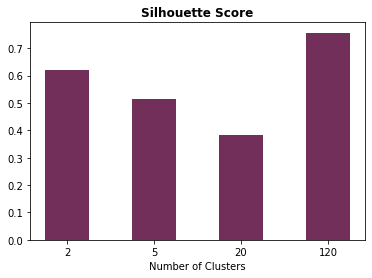

In [26]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

parameters = [2, 5, 20, 120]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=120)
kmeans.fit(data)

KMeans(n_clusters=120)

In [17]:
dataset_pca

,classname,subject,CorrectAnswers,TotalAnswers,CorrectAdaptive,TotalAdaptiveAnswers,TotalAdaptiveExercises,TotalExercises,start_year,start_month,end_year,end_month
PC_1,0.080198,0.017665,0.391382,0.405455,0.406521,0.40547,0.407954,0.397165,0.103856,0.055434,0.070137,0.055434
PC_2,0.010274,0.071872,0.009182,0.011342,0.078219,0.06946,0.074730,0.016318,0.170771,0.664953,0.253447,0.664953


In [23]:
pd.Categorical(kmeans.labels_)

[15, 15, 35, 35, 35, ..., 26, 78, 110, 109, 58]
Length: 2612
Categories (120, int64): [0, 1, 2, 3, ..., 116, 117, 118, 119]

<AxesSubplot:>

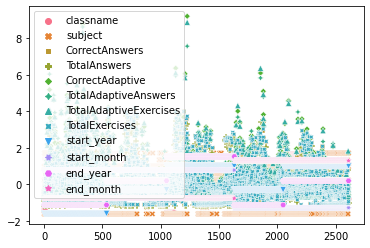

In [25]:
dataset_pca['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC_1",y="PC_2",data=dataset_pca)

In [ ]:
y = kmeans.predict(data)

In [ ]:
data['cat'] = y

In [ ]:
data

In [ ]:
data = pd.get_dummies(data, columns=['classname'])
data = pd.get_dummies(data, columns=['subject'])

In [ ]:
pd.DataFrame(data_scaled)

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

In [ ]:
wcss = []
for i in range(1,250):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(data_scaled)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,250),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
k_means_optimum = KMeans(n_clusters = 50, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(data_scaled)
print(y)

In [ ]:
data['cluster'] = y  

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

In [ ]:
data.head(1)

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.CorrectAnswers, data1.TotalAdaptiveAnswers, data1.TotalExercises, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.CorrectAnswers,data2.TotalAdaptiveAnswers,data2.TotalExercises,c ='green', label = 'Cluster 2')
# kplot.scatter3D(data3.CorrectAnswers,data3.TotalAdaptiveAnswers,data3.TotalExercises,c ='blue', label = 'Cluster 3')

plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1],k_means_optimum.cluster_centers_[:,2], color = 'indigo')
plt.legend()
plt.title("Kmeans")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_scaled,y)
print(score)

In [ ]:
# categorical_features_idx = [0, 1]

# mark_array=data.values

# kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)


In [ ]:
# print(kproto.cluster_centroids_)

In [ ]:
# clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
# data['cluster'] = list(clusters)

In [ ]:
data[data['cluster']== 0].head(10)
